In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

# Finding the maximum value in a list

This first example was prompted from the following blog:
http://love-python.blogspot.com/

In [2]:
mylist = [1, 5, 2, 9, 3, 7, 5, 2, 10, 9, 33, 2, 12]

#### baseline, python's builtin max

In [3]:
# Python's max built-in. This will be our baseline.
start = time.time()
max(mylist)
print( time.time() - start)

0.000214099884033


#### numpy's max

In [4]:
start = time.time()
np.max(mylist)
print( time.time() - start)

0.000298976898193


#### divide and conquer 

In [5]:
def find_max(li, left, right):
    if left == right:
        return li[left]
    mid = (left + right) / 2
    max1 = find_max(li, left, mid)
    max2 = find_max(li, mid+1, right)
    return max1 if max1 > max2 else max2
    
start = time.time()
print( find_max(mylist, 0, len(mylist)-1) )
print( time.time() - start)

33
0.000460147857666


#### Updating a value based on a conditional.

In [6]:
def find_max_2(li):
    old = li[0]
    for new in li:
        if new > old:
            old = new # only updates old if new value is greater.
        else:
            pass  
    return old

  
start = time.time()
print( find_max_2(mylist) )
print( time.time() - start)

33
0.000355958938599


#### similar to version of above, but uses np.where

In [9]:
def find_max_2v(li):
    old = li[0]
    for new in li:
        old = np.where(new > old, new, old) # if new > old, update old to be the new value.
    return int(old)  

start = time.time()
print( find_max_2v(mylist)  )
print( time.time() - start)

33
0.000448942184448


In [10]:
listsize = np.linspace(10, 1000000, 10)
listsize = [int(round(i)) for i in listsize]
listsize

time0, time1, time2, time3, time4 = [],[],[],[], []

for i in listsize:
    mylist  = list( np.arange(1, i) )
    
    
    # BASELINE
    start = time.time()
    max(mylist)
    time0.append( time.time() - start )
    
    # 1ST WAY
    start = time.time()
    np.max(mylist)
    time1.append( time.time() - start )
    
    # 2nd WAY
    start = time.time()
    find_max(mylist, 0, len(mylist)-1)
    time2.append( time.time() - start )
    
    # 3rd WAY
    start = time.time()
    find_max_2(mylist)
    time3.append( time.time() - start )
    
    # 4th WAY
    start = time.time()
    find_max_2v(mylist)
    time4.append( time.time() - start )
    

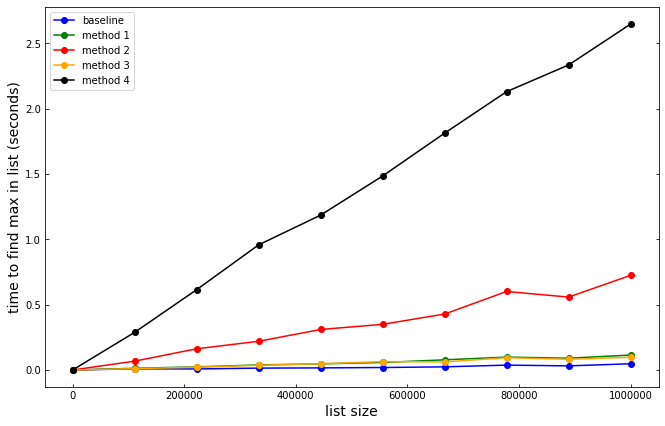

In [11]:
plt.figure(figsize=(11,7))
plt.plot(listsize, time0, marker='o', color='blue', label='baseline', )#alpha=0.3)
plt.plot(listsize, time1, marker='o', color='green', label='method 1',)# alpha=0.3)
plt.plot(listsize, time2, marker='o', color='red', label='method 2', )#alpha=0.3)
plt.plot(listsize, time3, marker='o', color='orange', label='method 3',)# alpha=0.3)
plt.plot(listsize, time4, marker='o', color='black', label='method 4',)# alpha=0.3)
plt.xlabel('list size', fontsize=14)
plt.ylabel('time to find max in list (seconds)', fontsize=14)
plt.legend(loc='best', numpoints=1)

### Last method is terribly long, lets remove it from plot

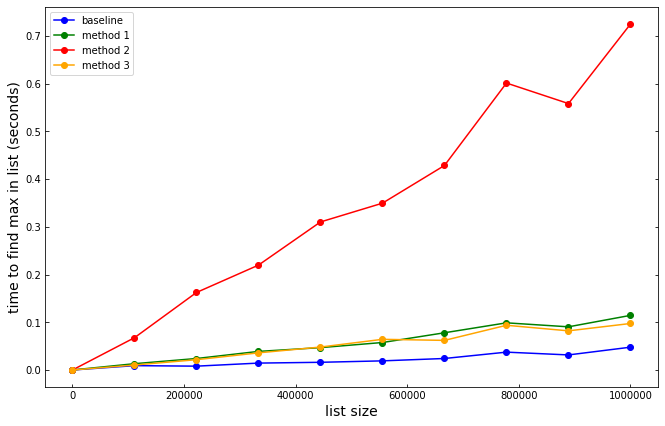

In [12]:
plt.figure(figsize=(11,7))
plt.plot(listsize, time0, marker='o', color='blue', label='baseline', )#alpha=0.3)
plt.plot(listsize, time1, marker='o', color='green', label='method 1',)# alpha=0.3)
plt.plot(listsize, time2, marker='o', color='red', label='method 2', )#alpha=0.3)
plt.plot(listsize, time3, marker='o', color='orange', label='method 3',)# alpha=0.3)
#plt.plot(listsize, time4, marker='o', color='black', label='method 4',)# alpha=0.3)
plt.xlabel('list size', fontsize=14)
plt.ylabel('time to find max in list (seconds)', fontsize=14)
plt.legend(loc='best', numpoints=1)

### The third method is just as good as np.max. 

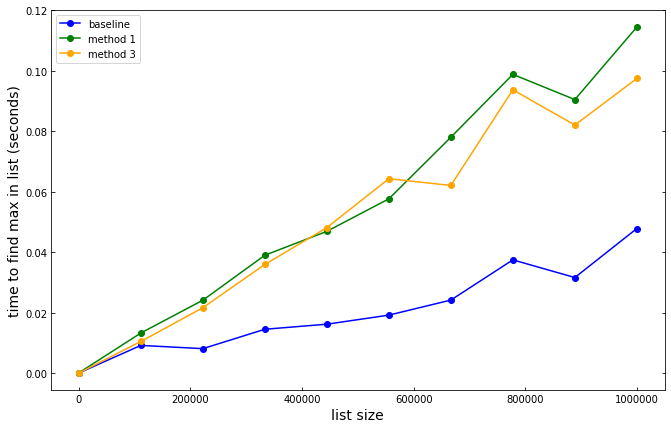

In [13]:
plt.figure(figsize=(11,7))
plt.plot(listsize, time0, marker='o', color='blue', label='baseline', )#alpha=0.3)
plt.plot(listsize, time1, marker='o', color='green', label='method 1',)# alpha=0.3)
#plt.plot(listsize, time2, marker='o', color='red', label='method 2', )#alpha=0.3)
plt.plot(listsize, time3, marker='o', color='orange', label='method 3',)# alpha=0.3)
#plt.plot(listsize, time4, marker='o', color='black', label='method 4',)# alpha=0.3)
plt.xlabel('list size', fontsize=14)
plt.ylabel('time to find max in list (seconds)', fontsize=14)
plt.legend(loc='best', numpoints=1)

# Fastest way to search a list, find the first occurrance of a value in that list, and return the index.

In [16]:
listsize = np.linspace(10, 10000, 10)
listsize = [int(round(i)) for i in listsize]
listsize

time0, time1, time2, time3 = [],[],[],[]

for i in listsize:
    mylist  = list( np.arange(1, i) )
    # the value we are searching for is the third from last in the list.
    # do this so we ensure we have a number in the list every time.
    value = mylist[-3] 
    
    # BASELINE
    start = time.time()
    mylist.index(value)  
    time0.append( time.time() - start )
    
    
    # 1ST WAY
    start = time.time()
    if value in mylist:
        print(mylist.index(value))
    time1.append( time.time() - start )
    
    
    # 2ND WAY
    start = time.time()
    try:
        print(mylist.index(value))
    except ValueError:
        print('None')
    time2.append( time.time() - start )
    
    
    # 3RD WAY
    start = time.time()
    for i, x in enumerate(mylist):
        if x == value:
            print(i)
    time3.append( time.time() - start )


6
6
6
1116
1116
1116
2226
2226
2226
3336
3336
3336
4446
4446
4446
5556
5556
5556
6666
6666
6666
7776
7776
7776
8886
8886
8886
9996
9996
9996


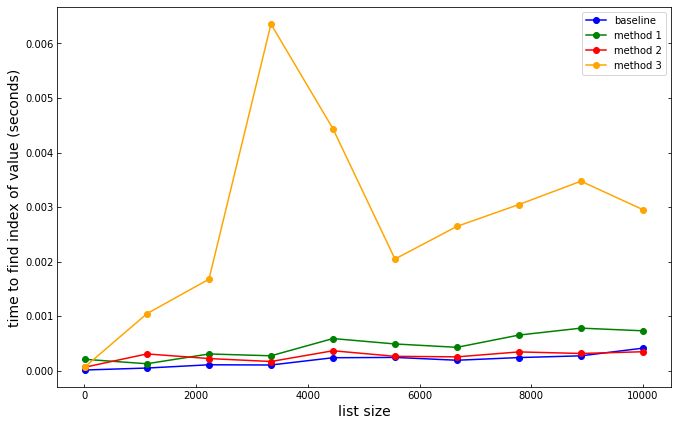

In [17]:
plt.figure(figsize=(11,7))
plt.plot(listsize, time0, marker='o', color='blue', label='baseline')
plt.plot(listsize, time1, marker='o', color='green', label='method 1')
plt.plot(listsize, time2, marker='o', color='red', label='method 2')
plt.plot(listsize, time3, marker='o', color='orange', label='method 3')
plt.xlabel('list size', fontsize=14)
plt.ylabel('time to find index of value (seconds)', fontsize=14)
plt.legend(loc='best', numpoints=1)

## Third method is terrible, lets remove it from plot

The first method uses the same function as the baseline, except it searches to see if the value is within the list first. Then it calls the index. Therefore, method 1 should always be longer than the baseline.

Method 2 also uses the same function as the baseline, but uses a try and except as well. 



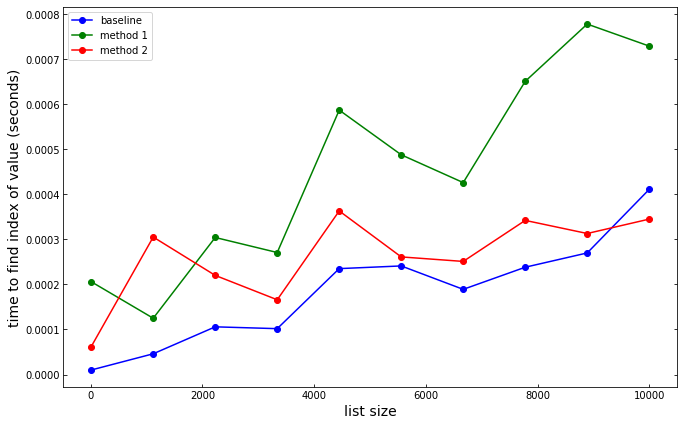

In [20]:
plt.figure(figsize=(11,7))
plt.plot(listsize, time0, marker='o', color='blue', label='baseline')
plt.plot(listsize, time1, marker='o', color='green', label='method 1')
plt.plot(listsize, time2, marker='o', color='red', label='method 2')
#plt.plot(listsize, time3, marker='o', color='orange', label='method 3')
plt.xlabel('list size', fontsize=14)
plt.ylabel('time to find index of value (seconds)', fontsize=14)
plt.legend(loc='best', numpoints=1)